In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fundusphotos/eye_diseases_classification/normal/2396_left.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/3017_left.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/3142_right.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/2710_right.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/3420_right.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/2795_left.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/2858_left.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/2880_right.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/2388_right.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/2979_right.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/3127_right.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/3198_left.jpg
/kaggle/input/fundusphotos/eye_diseases_classification/normal/3343_right.jpg
/kag

In [3]:
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate,Conv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model,Sequential
import cv2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.applications import VGG16, DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io, color
from tensorflow.keras.layers import Input, Flatten, concatenate
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import warnings
import os
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.layers import Flatten, Dense, Dropout, concatenate
from keras.models import Model
from keras.applications import VGG16, DenseNet121
from keras.regularizers import l2
from keras.optimizers import Adam

from keras.regularizers import l2
from keras.layers import Dense
from keras.models import Model
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Model
from keras.layers import Dense
from keras.regularizers import l2

Text(0.5, 1.0, 'Normal EYE IMAGE ')

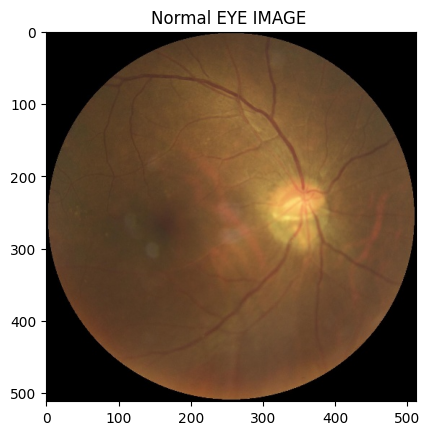

In [4]:
#displaying an Normal eye image
image=cv2.imread("/kaggle/input/fundusphotos/eye_diseases_classification/normal/2353_right.jpg")
image_2rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_2rgb)
plt.title("Normal EYE IMAGE ")

Text(0.5, 1.0, ' cataract eye image')

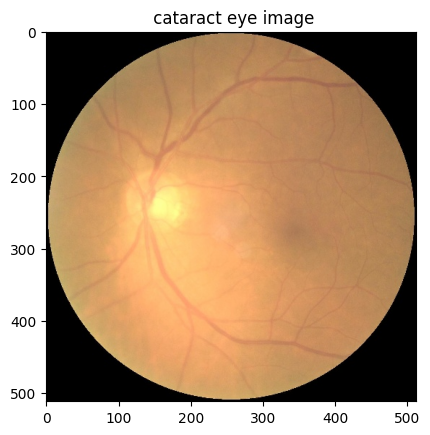

In [5]:
#displaying an Cataract eye image
image=cv2.imread("/kaggle/input/fundusphotos/eye_diseases_classification/cataract/1144_left.jpg")
image_2rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_2rgb)
plt.title(" cataract eye image")

In [6]:
#Preprocessing Images 
dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/fundusphotos/eye_diseases_classification',
    image_size=(224, 224),
    batch_size=32
)

Found 2074 files belonging to 2 classes.


In [7]:
def preprocess(images, labels):
    images = tf.image.resize(images, (224, 224))
    images = images / 255.0
    return images, labels

In [8]:
#applying the pre-processing function to the image
dataset = dataset.map(preprocess)

In [9]:
# Convert the dataset to numpy arrays
preprocessed_images, labels = [], []
for images, lbls in dataset:
    preprocessed_images.extend(images.numpy())
    labels.extend(lbls.numpy())
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)


In [10]:
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

In [11]:
#Loading CNN pre-trained models 
#inspired by https://www.youtube.com/watch?v=zBOavqh3kWU
#And custom CNN's By 

In [12]:
vgg_model= VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
#Concatitation for features

In [15]:
# Get model outputs without modifying the layer names
vgg_features = Flatten()(vgg_model.output)
densenet_features = Flatten()(densenet_model.output)

combined_features = concatenate([vgg_features, densenet_features])


In [16]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, labels, test_size=0.2, random_state=42)

In [25]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Ignore all UserWarnings
import os
import tensorflow as tf

# Suppress TensorFlow logging (only show warnings/errors)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all messages, 1 = filter out INFO messages, 2 = filter out WARNING messages

# Optionally, disable verbose logging in Keras
tf.get_logger().setLevel('ERROR')  # Only show errors

k=3

# Step 8: Store model performances
train_accuracies = []
train_losses = []


# K-Fold Cross Validation
for fold, (train_index, _) in enumerate(kf.split(preprocessed_images)):
    # Check if we've reached the desired number of folds
    print(f"Training fold {fold + 1}/{k}")
    
    # Split the data
    X_train = preprocessed_images[train_index]
    y_train = labels[train_index]

    # Freeze the layers in the VGG and DenseNet models
    for layer in vgg_model.layers:
        layer.trainable = False

    for layer in densenet_model.layers:
        layer.trainable = False

    # Create the model with concatenated features
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(combined_features)
    output = Dense(1, activation='sigmoid')(x)

    final_model = Model(inputs=[vgg_model.input, densenet_model.input], outputs=output)

    # Compile the model
    final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

    # Train the model on the current fold
    history = final_model.fit([X_train, X_train], y_train, epochs=5, batch_size=4, callbacks=[early_stopping])

    # Store training performance
    train_accuracy = history.history['accuracy'][-1]  # Get last epoch's training accuracy
    train_loss = history.history['loss'][-1]          # Get last epoch's training loss

    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    
    print(f"Finished training fold {fold + 1}/{k}. Accuracy: {train_accuracy:.4f}, Loss: {train_loss:.4f}")


Training fold 1/3
Epoch 1/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.8838 - loss: 11.0850
Epoch 2/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9457 - loss: 1.8259
Epoch 3/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9560 - loss: 0.6429
Epoch 4/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9205 - loss: 0.5349
Epoch 5/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9452 - loss: 0.4843
Finished training fold 1/3. Accuracy: 0.9536, Loss: 0.3819
Training fold 2/3
Epoch 1/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.9055 - loss: 8.2070
Epoch 2/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9505 - loss: 0.7446
Epoch 3/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9483 - loss: 0.3129
Epoch 4/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9624 - loss: 0.2284
Epoch 5/5
415/415 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9589 - loss: 0.1936
Finished training fold 2/3. Accura

In [26]:
test_loss, test_accuracy = final_model.evaluate([X_test,  X_test], y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9482 - loss: 0.2811 
Test Loss: 0.2830786406993866, Test Accuracy: 0.9542168378829956


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step


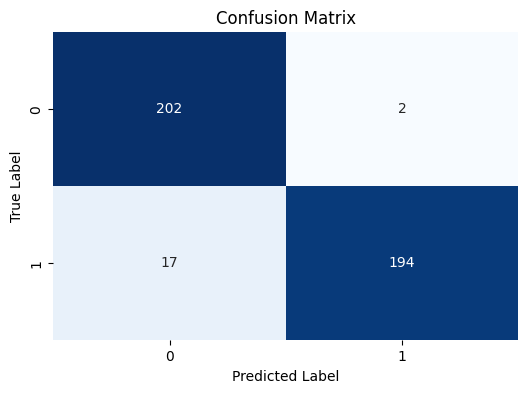

testing Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       204
           1       0.99      0.92      0.95       211

    accuracy                           0.95       415
   macro avg       0.96      0.95      0.95       415
weighted avg       0.96      0.95      0.95       415



In [29]:
from sklearn.metrics import confusion_matrix

# y_true: actual labels
# y_pred: predicted labels
# Make predictions on the test set
y_pred_prob = final_model.predict([X_test, X_test]) 
y_pred = (y_pred_prob > 0.5).astype(int) 

conf_matrix = confusion_matrix(y_test,y_pred  )


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



print("testing Classification Report:\n", classification_report(y_test,y_pred ))

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


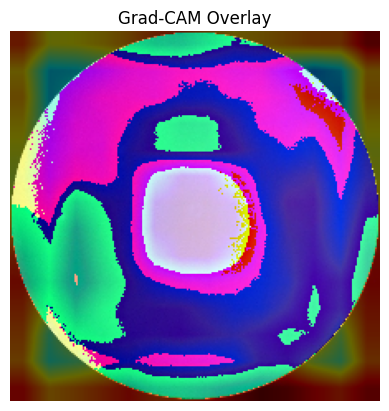

In [30]:

import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load and preprocess image
img = cv2.resize(cv2.imread('/kaggle/input/fundusphotos/eye_diseases_classification/cataract/1062_right.jpg'), (224, 224))
img_tensor = preprocess_input(np.expand_dims(img, axis=0))

# Define the Grad-CAM function
def compute_gradcam(model, img_tensor, layer_name, class_index=None):
    grad_model = tf.keras.models.Model(
        [model.input], 
        [model.get_layer(layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        loss = predictions[:, class_index]
    
    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    conv_outputs = conv_outputs * pooled_grads
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Load VGG16 model
vgg_model = VGG16(weights='imagenet')

# Compute Grad-CAM heatmap
heatmap = compute_gradcam(vgg_model, img_tensor, 'block5_conv2', class_index=0)
heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Convert heatmap to 8-bit image and apply color map
heatmap_img = np.uint8(255 * heatmap_resized)
heatmap_color = cv2.applyColorMap(heatmap_img, cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
superimposed_img = np.uint8(heatmap_color * 0.4 + np.uint8(img))

# Display the overlay image using matplotlib
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM Overlay')
plt.axis('off')
plt.show()

33188688/33188688 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


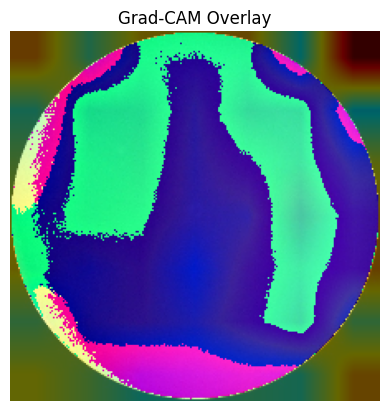

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

# Load and preprocess image
img = cv2.resize(cv2.imread('/kaggle/input/fundusphotos/eye_diseases_classification/cataract/1062_right.jpg'), (224, 224))
img_tensor = preprocess_input(np.expand_dims(img, axis=0))

# Define the Grad-CAM function
def compute_gradcam(model, img_tensor, layer_name, class_index=None):
    grad_model = tf.keras.models.Model(
        [model.input], 
        [model.get_layer(layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        loss = predictions[:, class_index]
    
    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    conv_outputs = conv_outputs * pooled_grads
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Load DenseNet model
densenet = DenseNet121(weights='imagenet')

# Compute Grad-CAM heatmap with a valid layer name
heatmap = compute_gradcam(densenet, img_tensor, 'conv5_block1_concat', class_index=0)
heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Convert heatmap to 8-bit image and apply color map
heatmap_img = np.uint8(255 * heatmap_resized)
heatmap_color = cv2.applyColorMap(heatmap_img, cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
superimposed_img = np.uint8(heatmap_color * 0.4 + img)  

# Display the overlay image using matplotlib
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM Overlay')
plt.axis('off')
plt.show()


In [32]:
from keras.preprocessing import image  # Make sure to import necessary libraries
import numpy as np

def predict_single_image(model, img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224)) 
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0) 
    img_array = img_array / 255.0 
    vgg_input = img_array  
    densenet_input = img_array  
      

    predictions = model.predict([vgg_input, densenet_input])
    predicted_class = (predictions > 0.5).astype(int)  
    return predicted_class[0][0]  # Return the predicted class




1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
The image is classified as: Normal


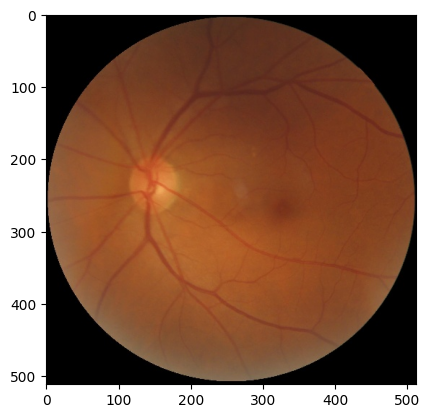

In [33]:
# Example image path
image_path = '/kaggle/input/fundus-testing/Unseen/Normal.jpg'

predicted_class = predict_single_image(final_model, image_path)

if predicted_class == 0:
    print("The image is classified as: Cataract")
else:
    print("The image is classified as: Normal")
    
#displaying an Cataract eye image
image=cv2.imread("/kaggle/input/fundus-testing/Unseen/Normal.jpg")
image_2rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_2rgb)


# ****Second Model****

Text(0.5, 1.0, 'Normal EYE IMAGE ')

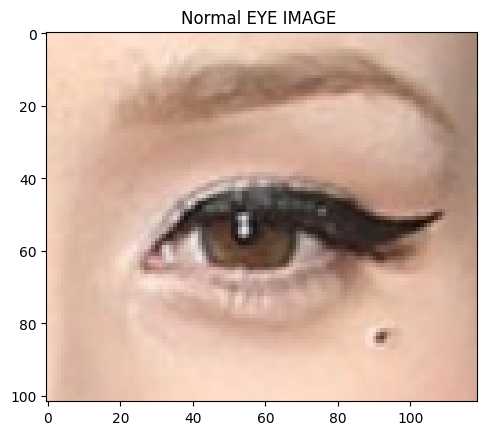

In [34]:
#displaying an Normal eye image
image=cv2.imread("/kaggle/input/eyesphotos/Dataset/normal/image_104.png")
image_2rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_2rgb)
plt.title("Normal EYE IMAGE ")

Text(0.5, 1.0, 'mature EYE IMAGE ')

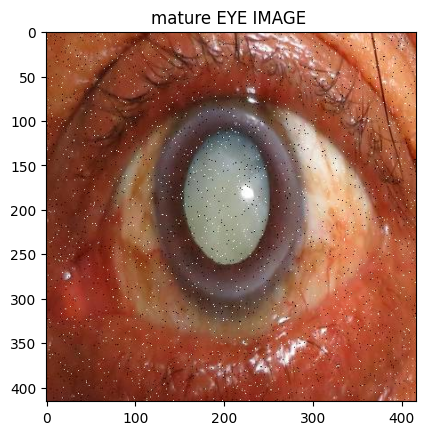

In [35]:
#displaying an mature eye image
image=cv2.imread("/kaggle/input/eyesphotos/Dataset/mature/10_JPG_jpg.rf.b514ac54fa6faa2e1bb5168968d709b2.jpg")
image_2rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_2rgb)
plt.title("mature EYE IMAGE ")

Text(0.5, 1.0, 'immature EYE IMAGE ')

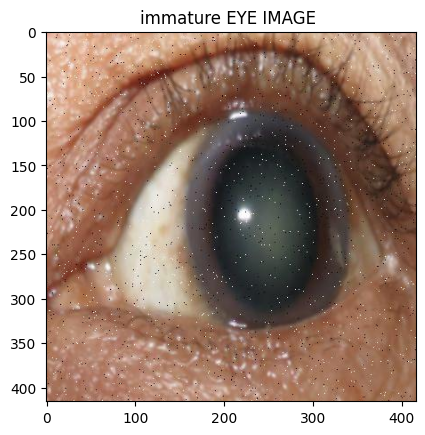

In [36]:
#displaying an immature eye image
image=cv2.imread("/kaggle/input/eyesphotos/Dataset/immature/10_JPG_jpg.rf.a3b10d94e424c24a0da12f09b50d5eac.jpg")
image_2rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_2rgb)
plt.title("immature EYE IMAGE ")

In [37]:
#Preprocessing Images 
nimdataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/eyesphotos/Dataset',
    image_size=(224, 224),
    batch_size=32
)

Found 585 files belonging to 3 classes.


In [38]:
def preprocess(images, labels):
    images = tf.image.resize(images, (224, 224))
    images = images / 255.0
    return images, labels

In [39]:
# Convert the dataset to numpy arrays
preprocessed_images, labels = [], []
for images, lbls in dataset:
    preprocessed_images.extend(images.numpy())
    labels.extend(lbls.numpy())
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

In [40]:
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

Loading pre-trained models

In [41]:
vgg_model= VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

In [42]:
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [43]:
# Get model outputs without modifying the layer names
vgg_features = Flatten()(vgg_model.output)
densenet_features = Flatten()(densenet_model.output)

combined_features = concatenate([vgg_features, densenet_features])

In [44]:
from keras.regularizers import l2

# Freeze the layers in the VGG and DenseNet models
for layer in vgg_model.layers:
    layer.trainable = False
    
for layer in densenet_model.layers:
    layer.trainable = False

x = Dense(512, activation='relu',
          kernel_regularizer=l2(0.01))(combined_features)
output = Dense(2, activation='softmax')(x)
# Create the final model with unique inputs and outputs
nim_model = Model(inputs=[vgg_model.input, densenet_model.input], outputs=output)

# Print model summary to verify
nim_model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 60,288,898 (229.98 MB)

 Trainable params: 38,536,706 (147.01 MB)

 Non-trainable params: 21,752,192 (82.98 MB)

In [45]:
from keras.optimizers import Adam

nim_model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, labels, test_size=0.2, random_state=42)

In [50]:
from keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(
    filepath='/kaggle/working/best_model2.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)


In [51]:
vgg_input = X_train  # Assign this input to the VGG part of the model
densenet_input = X_train  # Assign the same input for the DenseNet part


In [52]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Ignore all UserWarnings
import os
import tensorflow as tf

# Suppress TensorFlow logging (only show warnings/errors)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all messages, 1 = filter out INFO messages, 2 = filter out WARNING messages

# Optionally, disable verbose logging in Keras
tf.get_logger().setLevel('ERROR')  # Only show errors


history = nim_model.fit(
    [vgg_input, densenet_input],  # Provide your input data
    y_train,
    epochs=10,
    verbose=2,
    validation_data=([X_test, X_test], y_test),  # Include validation data
    callbacks=[callback, early_stopping],  # Include early stopping
    batch_size=4
)


Epoch 1/10

Epoch 1: val_loss improved from inf to 1.58532, saving model to /kaggle/working/best_model2.keras
415/415 - 69s - 167ms/step - accuracy: 0.8764 - loss: 4.0239 - val_accuracy: 0.8771 - val_loss: 1.5853
Epoch 2/10

Epoch 2: val_loss improved from 1.58532 to 0.57759, saving model to /kaggle/working/best_model2.keras
415/415 - 29s - 70ms/step - accuracy: 0.9084 - loss: 1.2878 - val_accuracy: 0.9542 - val_loss: 0.5776
Epoch 3/10

Epoch 3: val_loss did not improve from 0.57759
415/415 - 25s - 61ms/step - accuracy: 0.9283 - loss: 0.7299 - val_accuracy: 0.9157 - val_loss: 0.8493
Epoch 4/10

Epoch 4: val_loss improved from 0.57759 to 0.37448, saving model to /kaggle/working/best_model2.keras
415/415 - 29s - 70ms/step - accuracy: 0.9283 - loss: 0.7057 - val_accuracy: 0.9639 - val_loss: 0.3745
Epoch 5/10

Epoch 5: val_loss improved from 0.37448 to 0.32817, saving model to /kaggle/working/best_model2.keras
415/415 - 29s - 70ms/step - accuracy: 0.9331 - loss: 0.6238 - val_accuracy: 0.96

In [53]:
test_loss, test_accuracy = nim_model.evaluate([X_test, X_test], y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 591ms/step - accuracy: 0.9783 - loss: 0.2469
Test Loss: 0.27840185165405273, Test Accuracy: 0.9783132672309875


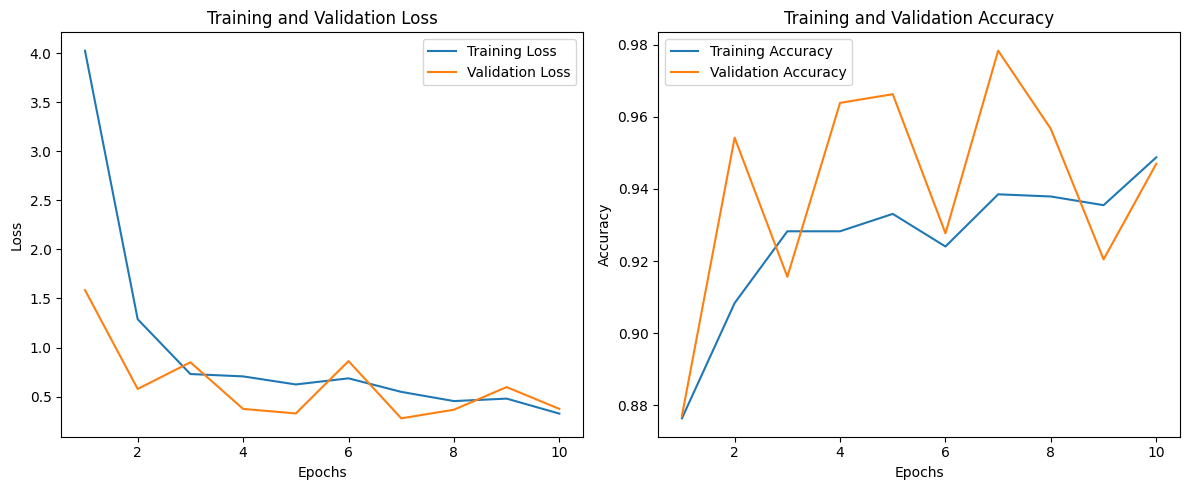

In [54]:
# Extracting the data from the history
epochs = range(1, len(history.history['loss']) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 873ms/step


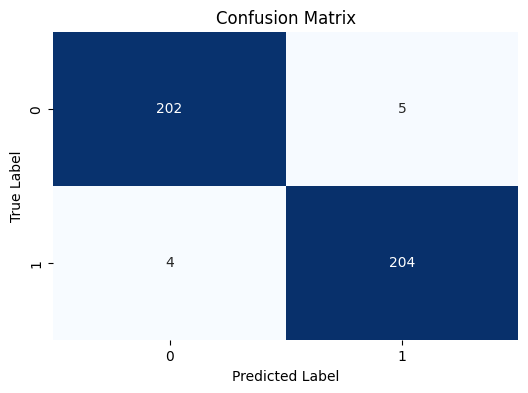

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       207
           1       0.98      0.98      0.98       208

    accuracy                           0.98       415
   macro avg       0.98      0.98      0.98       415
weighted avg       0.98      0.98      0.98       415



In [55]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `y_test` is already a 1D array of labels (not one-hot encoded)
y_test_labels = y_test  # No need to apply np.argmax if already in label format

# Convert model predictions (probabilities) to class labels
y_pred_prob = nim_model.predict([X_test, X_test])
y_pred_labels = np.argmax(y_pred_prob, axis=1)  # Predict class labels from probabilities

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))



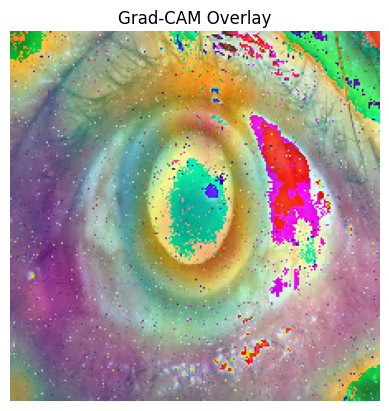

In [56]:

import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load and preprocess image
img = cv2.resize(cv2.imread('/kaggle/input/eyesphotos/Dataset/mature/10_JPG_jpg.rf.b514ac54fa6faa2e1bb5168968d709b2.jpg'), (224, 224))
img_tensor = preprocess_input(np.expand_dims(img, axis=0))

# Define the Grad-CAM function
def compute_gradcam(model, img_tensor, layer_name, class_index=None):
    grad_model = tf.keras.models.Model(
        [model.input], 
        [model.get_layer(layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        loss = predictions[:, class_index]
    
    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    conv_outputs = conv_outputs * pooled_grads
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Load VGG16 model
vgg_model = VGG16(weights='imagenet')

# Compute Grad-CAM heatmap
heatmap = compute_gradcam(vgg_model, img_tensor, 'block5_conv2', class_index=0)
heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Convert heatmap to 8-bit image and apply color map
heatmap_img = np.uint8(255 * heatmap_resized)
heatmap_color = cv2.applyColorMap(heatmap_img, cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
superimposed_img = np.uint8(heatmap_color * 0.4 + np.uint8(img))

# Display the overlay image using matplotlib
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM Overlay')
plt.axis('off')
plt.show()

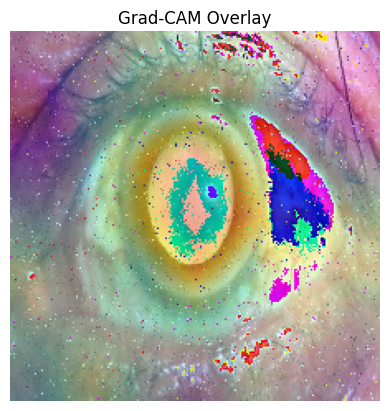

In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

# Load and preprocess image
img = cv2.resize(cv2.imread('/kaggle/input/eyesphotos/Dataset/mature/10_JPG_jpg.rf.b514ac54fa6faa2e1bb5168968d709b2.jpg'), (224, 224))
img_tensor = preprocess_input(np.expand_dims(img, axis=0))

# Define the Grad-CAM function
def compute_gradcam(model, img_tensor, layer_name, class_index=None):
    grad_model = tf.keras.models.Model(
        [model.input], 
        [model.get_layer(layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        loss = predictions[:, class_index]
    
    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    conv_outputs = conv_outputs * pooled_grads
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Load DenseNet model
densenet = DenseNet121(weights='imagenet')

# Compute Grad-CAM heatmap with a valid layer name
heatmap = compute_gradcam(densenet, img_tensor, 'conv5_block1_concat', class_index=0)
heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Convert heatmap to 8-bit image and apply color map
heatmap_img = np.uint8(255 * heatmap_resized)
heatmap_color = cv2.applyColorMap(heatmap_img, cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
superimposed_img = np.uint8(heatmap_color * 0.4 + img)  

# Display the overlay image using matplotlib
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM Overlay')
plt.axis('off')
plt.show()

In [58]:
from keras.preprocessing import image  # Make sure to import necessary libraries
import numpy as np

def predict_single_image(model, img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224)) 
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0) 
    img_array = img_array / 255.0 
    vgg_input = img_array  
    densenet_input = img_array  
   

    predictions = model.predict([vgg_input, densenet_input])
    predicted_class = (predictions > 0.5).astype(int)  
    return predicted_class[0][0]  # Return the predicted class



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The image is classified as: immature


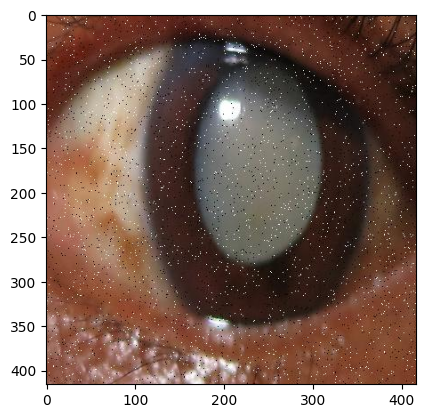

In [59]:
# Example image path
image_path = '/kaggle/input/unseeneyesphotos/unseennim/Mature.jpg'

predicted_class = predict_single_image(nim_model, image_path)

if predicted_class == 0:
    print("The image is classified as: immature")
elif predicted_class == 1:
    print("The image is classified as: mature")
elif predicted_class == 2:
    print("The image is classified as: normal")
else:
    print("The image is classified as: Unknown Class")

    
#displaying an Cataract eye image
image=cv2.imread("/kaggle/input/unseeneyesphotos/unseennim/Mature.jpg")
image_2rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_2rgb)
